In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("amazonreviews.tsv", sep="\t")

In [3]:
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [4]:
df.shape

(10000, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   10000 non-null  object
 1   review  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [9]:
df.isnull().sum()

label     0
review    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,label,review
count,10000,10000
unique,2,10000
top,neg,Stuning even for the non-gamer: This sound tra...
freq,5097,1


In [8]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()                       # lowercase
    text = re.sub(r'[^\w\s]', '', text)       # remove punctuation
    text = re.sub(r'\d+', '', text)           # remove numbers
    words = text.split()
    words = [w for w in words if w not in stop_words]  # remove stopwords
    return " ".join(words)

df["clean_review"] = df["review"].apply(preprocess)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91822\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


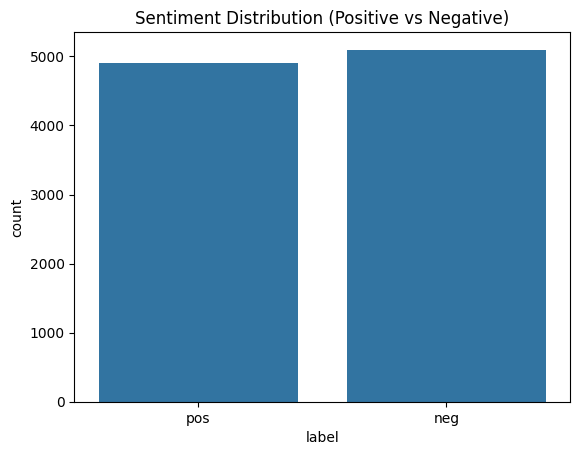

In [9]:
sns.countplot(x=df["label"])
plt.title("Sentiment Distribution (Positive vs Negative)")
plt.show()


In [ ]:
#Word cloud for all reviews

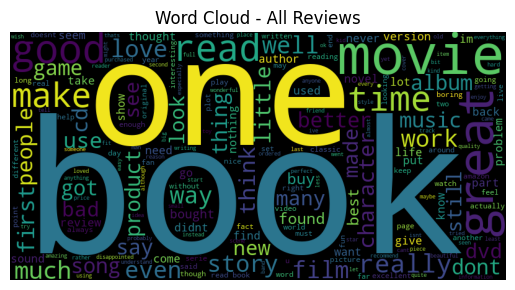

In [10]:
from wordcloud import WordCloud

text = " ".join(df["clean_review"])

wc = WordCloud(width=800, height=400).generate(text)
plt.imshow(wc)
plt.axis("off")
plt.title("Word Cloud - All Reviews")
plt.show()


In [17]:
#Separate word clouds for positive and negative

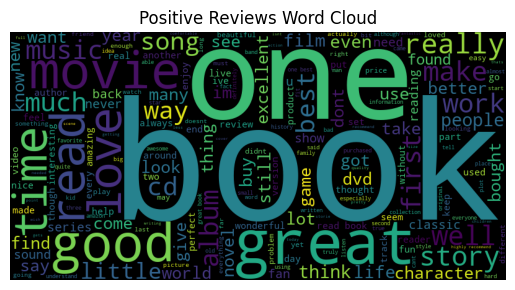

In [11]:
pos_text = " ".join(df[df["label"]=="pos"]["clean_review"])
neg_text = " ".join(df[df["label"]=="neg"]["clean_review"])

# Positive
plt.imshow(WordCloud(width=800, height=400).generate(pos_text))
plt.axis("off")
plt.title("Positive Reviews Word Cloud")
plt.show()

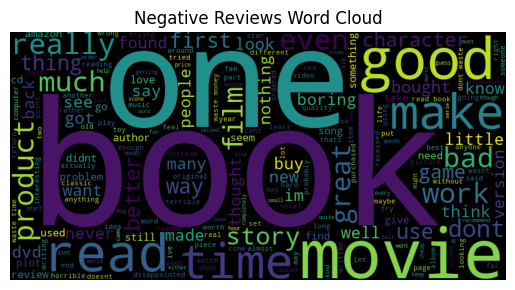

In [12]:
# Negative
plt.imshow(WordCloud(width=800, height=400).generate(neg_text))
plt.axis("off")
plt.title("Negative Reviews Word Cloud")
plt.show()

In [20]:
#Most common words (positive/negative)

In [13]:
from collections import Counter

# Positive
pos_words = " ".join(df[df["label"]=="pos"]["clean_review"]).split()
pos_common = Counter(pos_words).most_common(20)

# Negative
neg_words = " ".join(df[df["label"]=="neg"]["clean_review"]).split()
neg_common = Counter(neg_words).most_common(20)

print("Most Common Positive Words:", pos_common)
print("Most Common Negative Words:", neg_common)


Most Common Positive Words: [('book', 3313), ('great', 2087), ('one', 1835), ('good', 1635), ('read', 1553), ('like', 1268), ('movie', 1085), ('would', 943), ('love', 902), ('time', 871), ('well', 854), ('really', 826), ('best', 801), ('get', 793), ('story', 713), ('first', 708), ('much', 650), ('cd', 581), ('music', 559), ('also', 557)]
Most Common Negative Words: [('book', 3184), ('one', 2022), ('like', 1546), ('movie', 1465), ('would', 1438), ('dont', 1240), ('read', 1187), ('get', 1139), ('good', 1134), ('time', 1034), ('even', 898), ('buy', 814), ('really', 778), ('much', 769), ('bad', 749), ('money', 744), ('first', 736), ('could', 658), ('better', 656), ('great', 632)]


In [ ]:
#Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
X = df["clean_review"]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#TF-IDF Vectorization + Logistic Regression (Baseline Model)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [25]:
#Logestic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [17]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='binary', pos_label='pos'))
print(classification_report(y_test, y_pred))


Accuracy: 0.851
F1 Score: 0.8476482617586912
              precision    recall  f1-score   support

         neg       0.85      0.86      0.85      1019
         pos       0.85      0.85      0.85       981

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



In [28]:
# K-fold cross validation

In [18]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=5, scoring='f1_macro')
print("CV F1 Scores:", cv_scores)
print("Mean F1:", cv_scores.mean())

CV F1 Scores: [0.8543449  0.84933822 0.86245788 0.85179575 0.84935799]
Mean F1: 0.8534589472383416


In [19]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

svm_pred = svm_model.predict(X_test_tfidf)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("SVM F1:", f1_score(y_test, svm_pred, average='binary', pos_label='pos'))

SVM Accuracy: 0.8425
SVM F1: 0.8403446528129752


In [31]:
#Word2Vec Embeddings

In [ ]:
!pip install gensim

In [20]:
from gensim.models import Word2Vec

sentences = [row.split() for row in df["clean_review"]]
w2v = Word2Vec(sentences, vector_size=100, window=5, min_count=2)

In [21]:
def get_vector(text):
    words = text.split()
    vec = [w2v.wv[w] for w in words if w in w2v.wv]
    return np.mean(vec, axis=0) if vec else np.zeros(100)

X_train_w2v = np.vstack([get_vector(text) for text in X_train])
X_test_w2v = np.vstack([get_vector(text) for text in X_test])


In [22]:
#Train Classifier
model_w2v = LogisticRegression()
model_w2v.fit(X_train_w2v, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [37]:
#BERT Embeddings

In [ ]:
!pip install sentence-transformers

In [44]:
!pip install tf-keras

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 9.0 MB/s  0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 18.7 MB/s  0:00:00

  Attempting uninstall: keras

    Found existing installation: keras 2.15.0

   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
    Uninstalling keras-2.15.0:
   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
      Successfully uninstalled keras-2.15.0
   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
 

In [ ]:
from sentence_transformers import SentenceTransformer

bert = SentenceTransformer('all-MiniLM-L6-v2')

X_train_bert = bert.encode(X_train.tolist())
X_test_bert = bert.encode(X_test.tolist())


C:\Users\91822\anaconda3\envs\datasci\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
clf = LogisticRegression(max_iter=200)

In [ ]:
clf.fit(X_train_bert, y_train)